# Plots of different tensor components

In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid

In [2]:
Lcoarse = 50e3

In [3]:
Model_Tav = xr.open_dataset('./outputs_ncfiles/Model_Tav.nc')
Trac_Tav = xr.open_dataset('./outputs_ncfiles/Trac_Tav.nc')

In [5]:
diff_tensor = xr.open_dataset('./outputs_ncfiles/diff_tensor_'+str(int(Lcoarse//1e3))+'km.nc')
Trac_coarse = xr.open_dataset('./outputs_ncfiles/Trac_coarse_'+str(int(Lcoarse//1e3))+'km')
Vels_coarse = xr.open_dataset('./outputs_ncfiles/Vels_coarse_'+str(int(Lcoarse//1e3))+'km')
T_coarse    = xr.open_dataset('./outputs_ncfiles/T_coarse_'+str(int(Lcoarse//1e3))+'km')

In [6]:
list_trac = ['TRAC01', 'TRAC02', 'TRAC03', 'TRAC04', 'TRAC05', 
            'TRAC06', 'TRAC07', 'TRAC08', 'TRAC09', 'TRAC10', 
            'TRAC11', 'TRAC12', 'TRAC13', 'TRAC14', 'TRAC15', 
            'TRAC16', 'TRAC17', 'TRAC18', 'TRAC19', 'TRAC20']

In [29]:
Xcoarse = T_coarse.XCcoarse.data
Ycoarse = T_coarse.YCcoarse.data
Z = T_coarse.Z.data

Ypcol = np.append(Ycoarse, Ycoarse[-1]+Lcoarse)-Lcoarse/2
Xpcol = np.append(Xcoarse, Xcoarse[-1]+Lcoarse)-Lcoarse/2
Zpcol = np.append(Z, Z[-1])

In [30]:
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

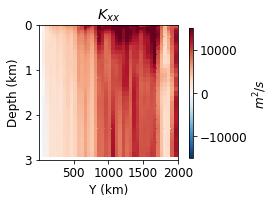

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3.))

im=ax.pcolormesh(Ypcol/1e3, Zpcol, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest').isel(i=0,j=0), 
             vmin = -15e3, vmax=15e3, cmap='RdBu_r', rasterized=True)
ax.set_title(r'$K_{xx}$')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3,2,1,0])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.24, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$m^2/s$')
#cbar_ax.set_ticks([0,2,4,6,8])
plt.savefig('kxx.pdf', dpi=200,bbox_inches='tight')

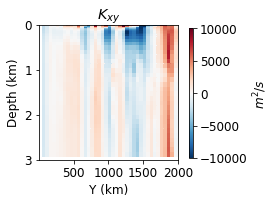

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3.))
lims=1e4
im=ax.pcolormesh(Ypcol/1e3, Zpcol, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest').isel(i=0,j=1), 
             vmin = -lims, vmax=lims, cmap='RdBu_r', rasterized=True)
ax.set_title(r'$K_{xy}$')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3,2, 1,0])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.24, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$m^2/s$')
plt.savefig('kxy.pdf', dpi=200,bbox_inches='tight')

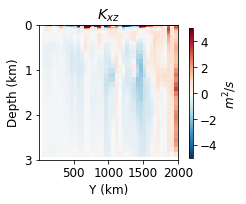

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3.))
lims=5
im=ax.pcolormesh(Ypcol/1e3, Zpcol, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest').isel(i=0,j=2), 
             vmin = -lims, vmax=lims, cmap='RdBu_r', rasterized=True)
ax.set_title(r'$K_{xz}$')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3,2, 1,0])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.24, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$m^2/s$')
plt.savefig('kxz.pdf', dpi=200,bbox_inches='tight')

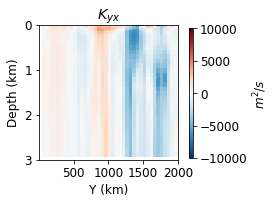

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(3., 3.))
lims=1e4
im=ax.pcolormesh(Ypcol/1e3, Zpcol, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest').isel(i=1,j=0), 
             vmin = -lims, vmax=lims, cmap='RdBu_r', rasterized=True)
ax.set_title(r'$K_{yx}$')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3,2, 1,0])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.24, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$m^2/s$')
plt.savefig('kyx.pdf', dpi=200,bbox_inches='tight')

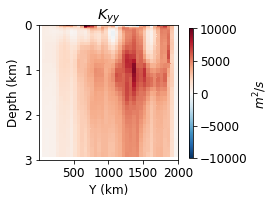

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3.))
lims=1e4
im=ax.pcolormesh(Ypcol/1e3, Zpcol, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest').isel(i=1,j=1), 
             vmin = -lims, vmax=lims, cmap='RdBu_r', rasterized=True)
ax.set_title(r'$K_{yy}$')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3,2, 1,0])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.24, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$m^2/s$')
plt.savefig('kyy.pdf', dpi=200,bbox_inches='tight')

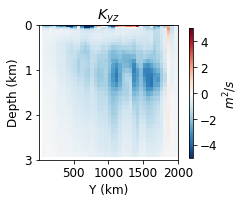

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3.))
lims=5
im=ax.pcolormesh(Ypcol/1e3, Zpcol, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest').isel(i=1,j=2), 
             vmin = -lims, vmax=lims, cmap='RdBu_r', rasterized=True)
ax.set_title(r'$K_{yz}$')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3,2, 1,0])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.24, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$m^2/s$')
plt.savefig('kyz.pdf', dpi=200,bbox_inches='tight')

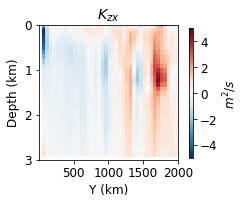

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3.))
lims=5
im=ax.pcolormesh(Ypcol/1e3, Zpcol, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest').isel(i=2,j=0), 
             vmin = -lims, vmax=lims, cmap='RdBu_r', rasterized=True)
ax.set_title(r'$K_{zx}$')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3,2, 1,0])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.24, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$m^2/s$')
plt.savefig('kzx.pdf', dpi=200,bbox_inches='tight')

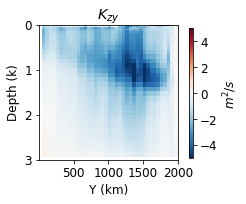

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3.))
lims=5
im=ax.pcolormesh(Ypcol/1e3, Zpcol, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest').isel(i=2,j=1), 
             vmin = -lims, vmax=lims, cmap='RdBu_r', rasterized=True)
ax.set_title(r'$K_{zy}$')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (k)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3,2, 1,0])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.24, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$m^2/s$')
plt.savefig('kzy.pdf', dpi=200,bbox_inches='tight')

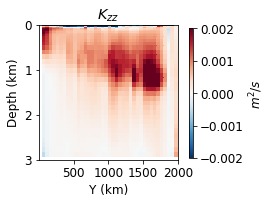

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3.))
lims=2e-3
im=ax.pcolormesh(Ypcol/1e3, Zpcol, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(XCcoarse=0, method='nearest').isel(i=2,j=2), 
             vmin = -lims, vmax=lims, cmap='RdBu_r', rasterized=True)
ax.set_title(r'$K_{zz}$')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3,2, 1,0])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.24, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel(r'$m^2/s$')
plt.savefig('kzz.pdf', dpi=200,bbox_inches='tight')